In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,SimpleRNN,LSTM,Embedding
from tensorflow import keras

#df=pd.read_csv('tweetSon_.csv')
df=pd.read_csv('dataset2.csv')
#df=pd.read_csv('yeni_dataset_clean.csv')
#df=pd.read_excel('/content/a.xlsx')
#df=pd.read_csv('/content/tweetSon_.csv')

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11222 entries, 0 to 11221
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  11222 non-null  int64 
 1   tweet       11222 non-null  object
 2   label       11222 non-null  object
 3   label2      11222 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 350.8+ KB


In [2]:
df.head()

,Unnamed: 0,tweet,label,label2
0,0,ya orospu cocuklari hepiniz niye ayni anda yaz...,nefret,1
1,1,ciddiye alan tüm dünyanın beynini sileyim.. iş...,saldırgan,2
2,2,kayıtlı i̇stihdama geçiş programına göre (?) ş...,hiçbiri,0
3,3,hastaneye git suriyeli. ptt ye git suriyeli. p...,nefret,1
4,4,cölesi bitmiş suriyeli gibiyim bugün,hiçbiri,0


In [3]:
#label=df['label'].values
label=df['label2'].values

tweet=df['tweet']

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
features=vectorizer.fit_transform(tweet)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test ,y_train, y_test=train_test_split(features.toarray(),label,test_size=0.3,random_state=42)

In [8]:
print(features.shape, X_train.shape, y_train.shape)

(11222, 56234) (7855, 56234) (7855,)


In [9]:
trainX = np.reshape(X_train, (X_train.shape[0],1,X_train.shape[1]))
testX = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))
trainY= np.reshape(y_train, (y_train.shape[0],1))
testY= np.reshape(y_test, (y_test.shape[0],1))

In [35]:
model = Sequential()

model.add(SimpleRNN(32,input_shape = (1,features.shape[1]), activation='relu',return_sequences=False))

model.add(Dropout(0.3))
model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='sigmoid'))

model.compile(loss="mean_absolute_error", optimizer='adam', metrics=["accuracy"])
#model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer="adam", metrics=["accuracy"])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 32)                1800544   
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 64)                2112      
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 128)               8320      
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)               

In [36]:
history=model.fit(trainX, trainY,validation_split=0.1, batch_size=800 ,epochs=100, verbose=2)

Epoch 1/100
9/9 - 7s - loss: 0.5197 - accuracy: 0.5381 - val_loss: 0.5164 - val_accuracy: 0.7481 - 7s/epoch - 754ms/step
Epoch 2/100
9/9 - 1s - loss: 0.5126 - accuracy: 0.5476 - val_loss: 0.5062 - val_accuracy: 0.7481 - 815ms/epoch - 91ms/step
Epoch 3/100
9/9 - 1s - loss: 0.4971 - accuracy: 0.5595 - val_loss: 0.4802 - val_accuracy: 0.7481 - 996ms/epoch - 111ms/step
Epoch 4/100
9/9 - 1s - loss: 0.4531 - accuracy: 0.5449 - val_loss: 0.4036 - val_accuracy: 0.7481 - 896ms/epoch - 100ms/step
Epoch 5/100
9/9 - 1s - loss: 0.3471 - accuracy: 0.5291 - val_loss: 0.2870 - val_accuracy: 0.7481 - 982ms/epoch - 109ms/step
Epoch 6/100
9/9 - 1s - loss: 0.2780 - accuracy: 0.4852 - val_loss: 0.2736 - val_accuracy: 0.7481 - 942ms/epoch - 105ms/step
Epoch 7/100
9/9 - 1s - loss: 0.2727 - accuracy: 0.4448 - val_loss: 0.2735 - val_accuracy: 0.7481 - 941ms/epoch - 105ms/step
Epoch 8/100
9/9 - 1s - loss: 0.2725 - accuracy: 0.4125 - val_loss: 0.2735 - val_accuracy: 0.7481 - 920ms/epoch - 102ms/step
Epoch 9/100


Epoch 68/100
9/9 - 1s - loss: 0.0230 - accuracy: 0.2640 - val_loss: 0.1929 - val_accuracy: 0.1336 - 964ms/epoch - 107ms/step
Epoch 69/100
9/9 - 1s - loss: 0.0229 - accuracy: 0.2553 - val_loss: 0.1922 - val_accuracy: 0.1336 - 1s/epoch - 113ms/step
Epoch 70/100
9/9 - 1s - loss: 0.0230 - accuracy: 0.2395 - val_loss: 0.1912 - val_accuracy: 0.1323 - 1s/epoch - 113ms/step
Epoch 71/100
9/9 - 1s - loss: 0.0232 - accuracy: 0.2460 - val_loss: 0.1942 - val_accuracy: 0.1298 - 978ms/epoch - 109ms/step
Epoch 72/100
9/9 - 1s - loss: 0.0229 - accuracy: 0.2532 - val_loss: 0.1954 - val_accuracy: 0.1425 - 1s/epoch - 114ms/step
Epoch 73/100
9/9 - 1s - loss: 0.0230 - accuracy: 0.2522 - val_loss: 0.1953 - val_accuracy: 0.1450 - 1s/epoch - 112ms/step
Epoch 74/100
9/9 - 1s - loss: 0.0229 - accuracy: 0.2568 - val_loss: 0.1954 - val_accuracy: 0.1425 - 955ms/epoch - 106ms/step
Epoch 75/100
9/9 - 1s - loss: 0.0229 - accuracy: 0.2532 - val_loss: 0.1955 - val_accuracy: 0.1412 - 961ms/epoch - 107ms/step
Epoch 76/100

In [37]:
trainscore= model.evaluate(testX,testY,verbose=0)
print(trainscore)

[0.18647903203964233, 0.16869616508483887]


In [38]:
class_names = ["hiçbiri","nefret","saldırgan"]

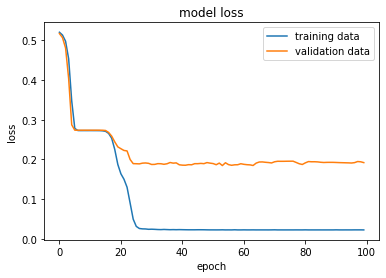

In [39]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

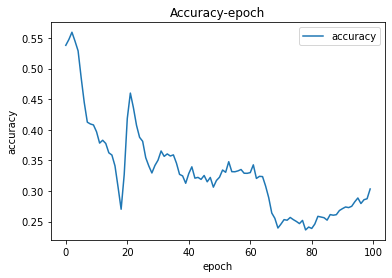

In [40]:
plt.plot(history.history['accuracy'])

plt.title('Accuracy-epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['accuracy'], loc = 'upper right')

In [41]:
from sklearn.metrics import classification_report

y_pred = model.predict(testX, batch_size=200,verbose=0)
    
#y_pred_bool = np.round(y_pred)
y_pred_bool = np.argmax(y_pred,axis=1)


print(classification_report(testY, y_pred_bool,target_names=class_names ))


              precision    recall  f1-score   support

     hiçbiri       0.17      0.02      0.04      2501
      nefret       0.17      0.62      0.27       811
   saldırgan       0.06      0.05      0.06        55

    accuracy                           0.17      3367
   macro avg       0.13      0.23      0.12      3367
weighted avg       0.17      0.17      0.10      3367



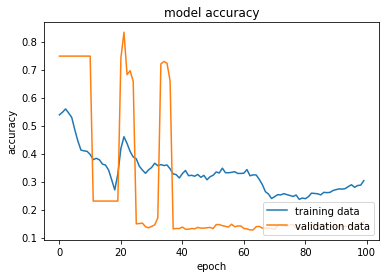

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')